In [88]:
martini2 = [10000,40000,28000,18000,20000,11000,60000,60000,60000,60000,40000,40000,60000,60000,
            60000,60000,40000,40000,60000,60000,60000,60000,60000,60000]
K_boltzmann = [7538.791985,37041.7569,5473.820313,26750.24489,142.9286624,10977.80691,19801.40344,
               36879.00546,24319.37415,44571.1832,31810.476,32666.67403,53086.62883,1894.948061,
               40100.78068,72650.62202,50198.40179,53081.87911,182.5401798,36863.21938,40782.90211,
               84528.27601,41133.69392,46244.07767]

import numpy as np
np.corrcoef(martini2, K_boltzmann)

array([[1.        , 0.45720631],
       [0.45720631, 1.        ]])

In [89]:
martini_data = [0.363,0.202,0.293,0.286,0.292,0.28,0.234,0.263,0.299,0.162,0.335,0.32,0.296,0.291,0.296,0.162,0.385,0.32,0.224,0.281,0.267,0.224,0.289,0.276,0.354]
boltzmann_dist_data = [0.407713445,0.240216956,0.343448102,0.329894573,0.525525345,0.330125308,
                       0.233217213,0.269362292,0.295848259,0.162829001,0.329688086,0.341282879,
                       0.29522389,0.245692172,0.291034438,0.162940589,0.389827467,0.339710294,
                       0.055982705,0.285937434,0.267677625,0.221067451,0.268600881,0.20968964,0.506]
gaussian_dist_data = [0.412558467,0.236942976,0.338189474,0.329147264,0.338049492,0.328881889,
                      0.231969438,0.269096832,0.294355397,0.163957088,0.328951661,0.340896505,
                      0.295066947,0.293022854,0.291067187,0.163025494,0.389928094,0.339014621,
                      0.223939049,0.285943739,0.267981535,0.221055534,0.268946216,0.209043448,
                      0.330715567]


import numpy as np
print("correlation of distance : martini2 vs boltzmann")
print(np.corrcoef(martini_data, boltzmann_dist_data))

print("correlation of distance : gaussian vs boltzmann")
print(np.corrcoef(gaussian_dist_data, boltzmann_dist_data))

correlation of distance : martini2 vs boltzmann
[[1.         0.74387627]
 [0.74387627 1.        ]]
correlation of distance : gaussian vs boltzmann
[[1.         0.80182305]
 [0.80182305 1.        ]]


### SIRNA parameters

In [90]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

In [91]:
distance_dict = dict.fromkeys(['BB1_BB2','BB2_BB3','BB3_ASC1','ASC2_ASC4','ASC1_ASC3','ASC1_ASC2','ASC2_ASC3','ASC3_ASC4',\
'ASC4_ASC1','BB3_USC1','USC1_USC2','USC2_USC3','USC3_USC1','BB3_GSC1','GSC2_GSC4','GSC1_GSC3','GSC1_GSC2','GSC2_GSC3',\
'GSC3_GSC4','GSC4_GSC1','BB3_CSC1','CSC1_CSC2','CSC2_CSC3','CSC3_CSC1'])

In [92]:
distance_parameters = pd.DataFrame()
distance_parameters_dict = {'Parameter':[],'raw data mean value':[],
                            'raw data mode value gaussian-fitted mode value':[],
                           'Seed value obtained using BOltzmann inversion':[],
                           'K from boltzmann inversion':[]}

In [93]:
def return_modes_of_data(data):   
    data = data
    n = np.histogram(data)
    count_dict = {}
    for i in range(0,len(n[0])):
        count_dict[n[0][i]] = n[1][i]
    return sorted(count_dict.items()),data.mean()

In [94]:
# df_Hmapped_distance_7w0f = pd.read_csv('piRNA_simu_files/3O3I/dist_final.xvg')
df_Hmapped_distance_all = pd.read_csv('Xray_params_sirna/dist_Xray.csv')

In [95]:
df_Hmapped_distance_all

,BB1_BB2,BB2_BB3,BB3_ASC1,ASC2_ASC4,ASC1_ASC3,ASC1_ASC2,ASC2_ASC3,ASC3_ASC4,ASC4_ASC1,BB3_USC1,...,GSC1_GSC3,GSC1_GSC2,GSC2_GSC3,GSC3_GSC4,GSC4_GSC1,BB3_CSC1,CSC1_CSC2,CSC2_CSC3,CSC3_CSC1,BB3_pBB1
0,0.325,0.270,0.338,0.330,0.340,0.233,0.269,0.293,0.163,0.330,...,0.341,0.296,0.294,0.292,0.163,0.332,0.224,0.286,0.268,0.335
1,0.330,0.267,0.336,0.337,0.345,0.237,0.276,0.300,0.163,0.324,...,0.342,0.303,0.295,0.301,0.163,0.326,0.229,0.291,0.274,0.382
2,0.321,0.269,0.339,0.331,0.341,0.233,0.269,0.295,0.163,0.324,...,0.341,0.295,0.294,0.293,0.163,0.329,0.224,0.285,0.267,0.339
3,0.329,0.269,0.339,0.329,0.340,0.233,0.269,0.293,0.163,0.331,...,0.341,0.296,0.295,0.293,0.163,0.331,0.224,0.286,0.267,0.393
4,0.331,0.268,0.338,0.337,0.346,0.238,0.276,0.300,0.163,0.325,...,0.342,0.303,0.295,0.302,0.163,0.326,0.229,0.291,0.274,0.344
5,0.327,0.270,0.336,0.330,0.341,0.234,0.269,0.294,0.163,0.332,...,0.342,0.298,0.294,0.293,0.163,0.333,0.225,0.286,0.268,0.366
6,0.327,0.261,0.336,0.328,0.342,0.233,0.269,0.294,0.162,0.330,...,0.341,0.296,0.294,0.295,0.162,0.328,0.224,0.286,0.268,0.343
7,0.323,0.268,0.332,0.331,0.342,0.235,0.269,0.295,0.164,0.334,...,0.344,0.299,0.296,0.294,0.165,0.333,0.227,0.289,0.269,0.383
8,0.324,0.271,0.342,0.333,0.344,0.236,0.270,0.298,0.164,0.332,...,0.342,0.299,0.292,0.296,0.164,0.331,0.225,0.288,0.269,0.409


In [96]:
# 1rpu  1si3  2f8s  3cz3  4ngd  4nh3  5n8l  6bjv  6ra4  7w0f
BB1_BB2_Hmapped_distance_all = df_Hmapped_distance_all['BB1_BB2']
BB2_BB3_Hmapped_distance_all = df_Hmapped_distance_all['BB2_BB3']
BB3_ASC1_Hmapped_distance_all = df_Hmapped_distance_all['BB3_ASC1']
BB3_USC1_Hmapped_distance_all = df_Hmapped_distance_all['BB3_USC1']
BB3_GSC1_Hmapped_distance_all = df_Hmapped_distance_all['BB3_GSC1']
BB3_CSC1_Hmapped_distance_all = df_Hmapped_distance_all['BB3_CSC1']
ASC1_ASC2_Hmapped_distance_all = df_Hmapped_distance_all['ASC1_ASC2']
ASC2_ASC3_Hmapped_distance_all = df_Hmapped_distance_all['ASC2_ASC3']
ASC3_ASC4_Hmapped_distance_all = df_Hmapped_distance_all['ASC3_ASC4']
ASC4_ASC1_Hmapped_distance_all = df_Hmapped_distance_all['ASC4_ASC1']
ASC2_ASC4_Hmapped_distance_all = df_Hmapped_distance_all['ASC2_ASC4']
ASC1_ASC3_Hmapped_distance_all = df_Hmapped_distance_all['ASC1_ASC3']
GSC1_GSC2_Hmapped_distance_all = df_Hmapped_distance_all['GSC1_GSC2']
GSC2_GSC3_Hmapped_distance_all = df_Hmapped_distance_all['GSC2_GSC3']
GSC3_GSC4_Hmapped_distance_all = df_Hmapped_distance_all['GSC3_GSC4']
GSC4_GSC1_Hmapped_distance_all = df_Hmapped_distance_all['GSC4_GSC1']
GSC2_GSC4_Hmapped_distance_all = df_Hmapped_distance_all['GSC2_GSC4']
GSC1_GSC3_Hmapped_distance_all = df_Hmapped_distance_all['GSC1_GSC3']
CSC1_CSC2_Hmapped_distance_all = df_Hmapped_distance_all['CSC1_CSC2']
CSC2_CSC3_Hmapped_distance_all = df_Hmapped_distance_all['CSC2_CSC3']
CSC3_CSC1_Hmapped_distance_all = df_Hmapped_distance_all['CSC3_CSC1']
USC1_USC2_Hmapped_distance_all = df_Hmapped_distance_all['USC1_USC2']
USC2_USC3_Hmapped_distance_all = df_Hmapped_distance_all['USC2_USC3']
USC3_USC1_Hmapped_distance_all = df_Hmapped_distance_all['USC3_USC1']
BB3_pBB1_Hmapped_distance_all = df_Hmapped_distance_all['BB3_pBB1']

In [97]:
def return_modes_of_data(data):   
    data = data
    n = np.histogram(data)
    count_dict = {}
    for i in range(0,len(n[0])):
        count_dict[n[0][i]] = n[1][i]
    return sorted(count_dict.items()),data.mean()

In [98]:
def P2U(p):
     boltzmann = 1.9858285706E-3 # Kcal/K
     T = 298.15 # K
     p_max = p.max()
     return - boltzmann * T * np.log(p / p_max)

In [99]:
def harmonic(r, r0, k):
     return 0.5 * k * (r - r0) ** 2

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_pBB1_Hmapped_distance_all
Mean: Raw data 0.36599999999999994
Mode: Raw data 0.3455629424390073
Mode: Gauss-fitted 0.3455629424390073


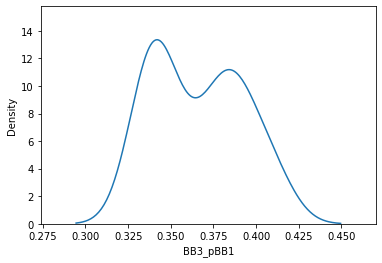

In [100]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_pBB1_Hmapped_distance_all)
xmean = np.mean(BB3_pBB1_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB3_pBB1_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_pBB1_Hmapped_distance_all,bw=0.5)

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
# 
print("BB3_pBB1_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.3684108087748492
parameter K is:  890.281745551224


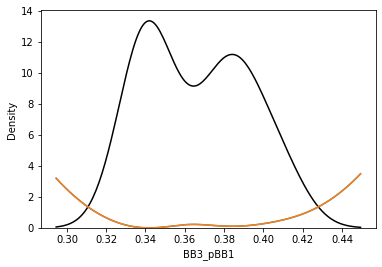

In [101]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_pBB1_Hmapped_distance_all,bw=0.5,color='black')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.34, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])


distance_parameters_dict['Parameter'].append('BB3_pBB1')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])


BB1_BB2_Hmapped_distance_all
Mean: Raw data 0.32633333333333325
Mode: Raw data 0.3267502169149463
Mode: Gauss-fitted 0.3267502169149463


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


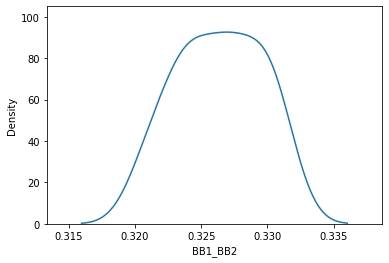

In [102]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB1_BB2_Hmapped_distance_all)
xmean = np.mean(BB1_BB2_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB1_BB2_Hmapped_distance_all, kde=True, 
            norm_hist=False,color='white',
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB1_BB2_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB1_BB2_Hmapped_distance_all,bw=0.5)
# 
# 
# 

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
# 
print("BB1_BB2_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.32617764424662454
parameter K is:  52999.84517727522


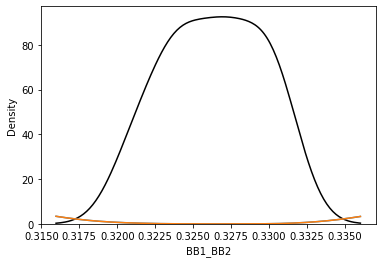

In [103]:
#get probability distribution from data
plt2 = sns.kdeplot(BB1_BB2_Hmapped_distance_all,bw=0.5,color='black')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.326, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])


distance_parameters_dict['Parameter'].append('BB1_BB2')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])


BB2_BB3_Hmapped_distance_all
Mean: Raw data 0.26811111111111113
Mode: Raw data 0.268949786450917
Mode: Gauss-fitted 0.268949786450917


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.8 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


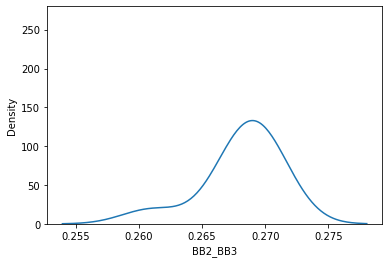

In [104]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_Hmapped_distance_all)
xmean = np.mean(BB2_BB3_Hmapped_distance_all)
xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB2_BB3_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_Hmapped_distance_all,bw=0.8)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB2_BB3_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.8 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.3078681266710889
parameter K is:  1348.226141402093


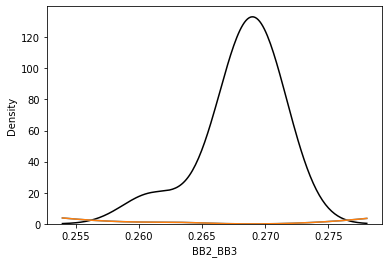

In [105]:
#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_Hmapped_distance_all,bw=0.8,color='black')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.268, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('BB2_BB3')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_ASC1_Hmapped_distance_all
Mean: Raw data 0.3373333333333333
Mode: Raw data 0.3374695264293209
Mode: Gauss-fitted 0.3374695264293209


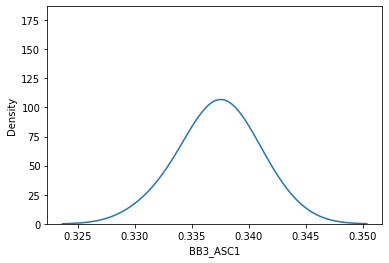

In [106]:

# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_ASC1_Hmapped_distance_all)
xmean = np.mean(BB3_ASC1_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB3_ASC1_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_ASC1_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_ASC1_Hmapped_distance_all,bw=1)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_ASC1_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


parameter R_o is:  0.33711949107678474
parameter K is:  41001.466590557844


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


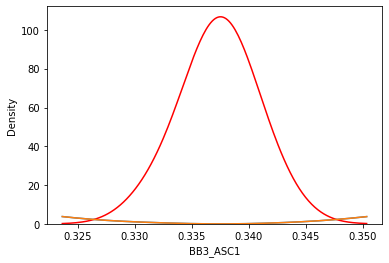

In [107]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_ASC1_Hmapped_distance_all,bw=1,color='red')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.33, 20000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('BB3_ASC1')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_USC1_Hmapped_distance_all
Mean: Raw data 0.3291111111111111
Mode: Raw data 0.3312917684040797
Mode: Gauss-fitted 0.3312917684040797


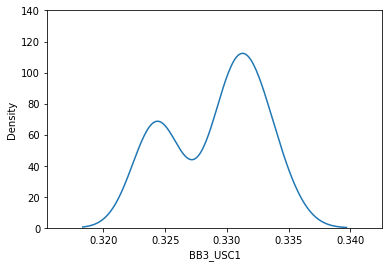

In [108]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_USC1_Hmapped_distance_all)
xmean = np.mean(BB3_USC1_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB3_USC1_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_USC1_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_USC1_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_USC1_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  0.3286899015353832
parameter K is:  48404.20682902364


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


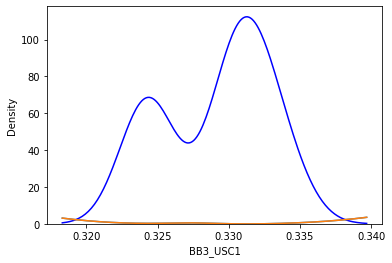

In [109]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_USC1_Hmapped_distance_all,bw=0.5,color='blue')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.33, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('BB3_USC1')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.7 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_GSC1_Hmapped_distance_all
Mean: Raw data 0.33444444444444443
Mode: Raw data 0.3335555962030293
Mode: Gauss-fitted 0.3335555962030293


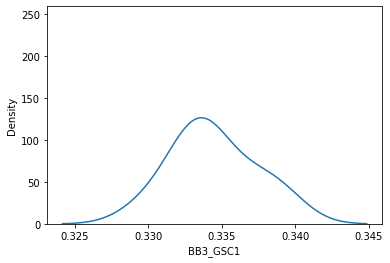

In [110]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_GSC1_Hmapped_distance_all)
xmean = np.mean(BB3_GSC1_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB3_GSC1_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_GSC1_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_GSC1_Hmapped_distance_all,bw=0.7)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_GSC1_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.7 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.3345986993563327
parameter K is:  61367.57289090634


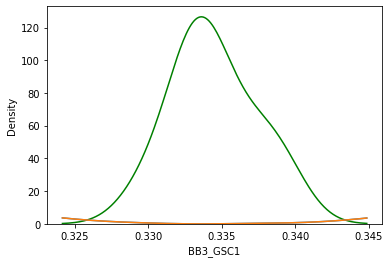

In [111]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_GSC1_Hmapped_distance_all,bw=0.7,color='green')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.34, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('BB3_GSC1')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.4 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_CSC1_Hmapped_distance_all
Mean: Raw data 0.3298888888888889
Mode: Raw data 0.33158625901800853
Mode: Gauss-fitted 0.33158625901800853


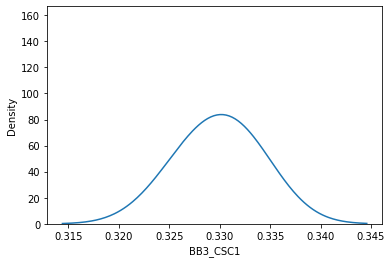

In [112]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_CSC1_Hmapped_distance_all)
xmean = np.mean(BB3_CSC1_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB3_CSC1_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_CSC1_Hmapped_distance_all,bins=10)
# 
# 
# 

# density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_CSC1_Hmapped_distance_all,bw=1.4)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_CSC1_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.4 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.3297493507419067
parameter K is:  27965.977667052903


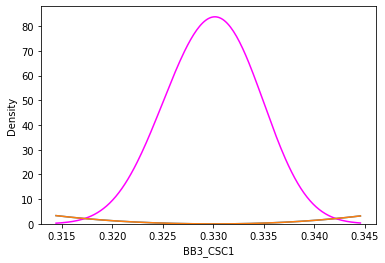

In [113]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_CSC1_Hmapped_distance_all,bw=1.4,color='magenta')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.33, 800])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('BB3_CSC1')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC1_ASC2_Hmapped_distance_all
Mean: Raw data 0.2346666666666667
Mode: Raw data 0.23339788646992732
Mode: Gauss-fitted 0.23339788646992732


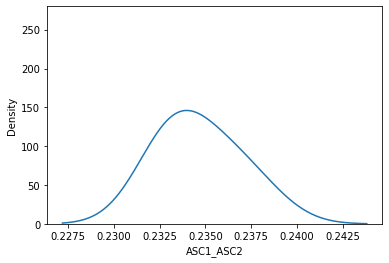

In [114]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC1_ASC2_Hmapped_distance_all)
xmean = np.mean(ASC1_ASC2_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(ASC1_ASC2_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC1_ASC2_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC1_ASC2_Hmapped_distance_all,bw=1)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("ASC1_ASC2_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  0.2348857409931484
parameter K is:  87947.93830926146


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


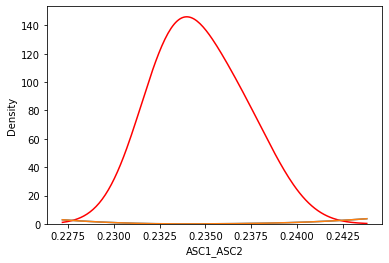

In [115]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC1_ASC2_Hmapped_distance_all,bw=1,color='red')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.232, 10000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('ASC1_ASC2')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC2_ASC3_Hmapped_distance_all
Mean: Raw data 0.2706666666666666
Mode: Raw data 0.2691535296512359
Mode: Gauss-fitted 0.2691535296512359


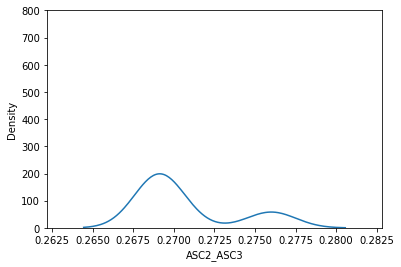

In [116]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC2_ASC3_Hmapped_distance_all)
xmean = np.mean(ASC2_ASC3_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(ASC2_ASC3_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC2_ASC3_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC2_ASC3_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("ASC2_ASC3_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.24855563666765337
parameter K is:  3500.9927659960226


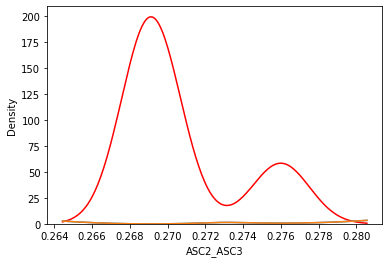

In [117]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC2_ASC3_Hmapped_distance_all,bw=0.5,color='red')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.27, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('ASC2_ASC3')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC3_ASC4_Hmapped_distance_all
Mean: Raw data 0.29577777777777775
Mode: Raw data 0.2941166390540066
Mode: Gauss-fitted 0.2941166390540066


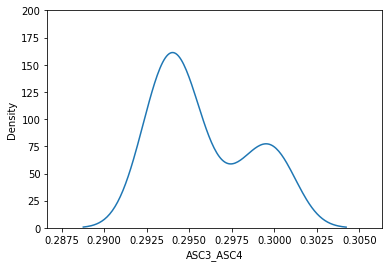

In [118]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC3_ASC4_Hmapped_distance_all)
xmean = np.mean(ASC3_ASC4_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(ASC3_ASC4_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC3_ASC4_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC3_ASC4_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("ASC3_ASC4_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.2962742444760324
parameter K is:  87366.04793853888


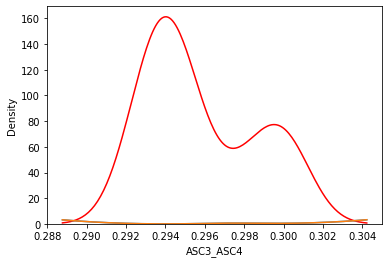

In [119]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC3_ASC4_Hmapped_distance_all,bw=0.5,color='red')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.294, 5000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('ASC3_ASC4')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

ASC4_ASC1_Hmapped_distance_all
Mean: Raw data 0.1631111111111111
Mode: Raw data 0.16301086280317237
Mode: Gauss-fitted 0.16301086280317237


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


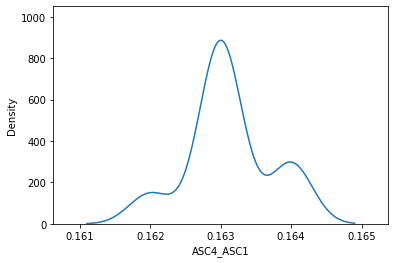

In [120]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC4_ASC1_Hmapped_distance_all)
xmean = np.mean(ASC4_ASC1_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(ASC4_ASC1_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC4_ASC1_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC4_ASC1_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("ASC4_ASC1_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  0.17344182801625688
parameter K is:  20370.585996832648


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


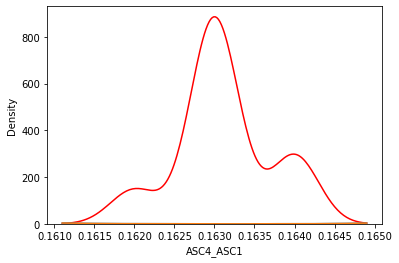

In [121]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC4_ASC1_Hmapped_distance_all,bw=0.5,color='red')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.163, 8000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('ASC4_ASC1')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

ASC2_ASC4_Hmapped_distance_all
Mean: Raw data 0.3317777777777777
Mode: Raw data 0.3301615861440831
Mode: Gauss-fitted 0.3301615861440831


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


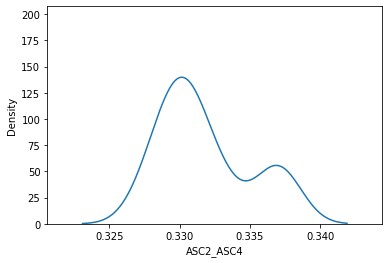

In [122]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC2_ASC4_Hmapped_distance_all)
xmean = np.mean(ASC2_ASC4_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(ASC2_ASC4_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC2_ASC4_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC2_ASC4_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("ASC2_ASC4_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

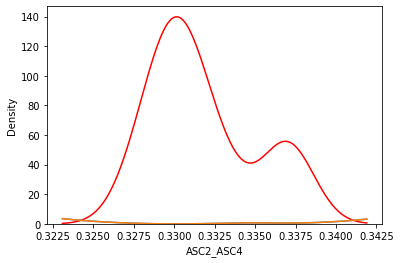

In [123]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC2_ASC4_Hmapped_distance_all,bw=0.5,color='red')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.30, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('ASC2_ASC4')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC1_ASC3_Hmapped_distance_all
Mean: Raw data 0.3423333333333333
Mode: Raw data 0.3411513723521619
Mode: Gauss-fitted 0.3411513723521619


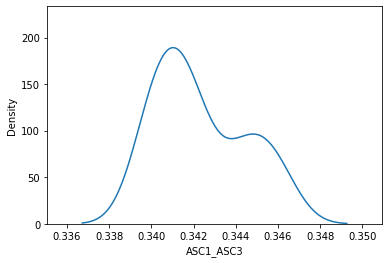

In [124]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC1_ASC3_Hmapped_distance_all)
xmean = np.mean(ASC1_ASC3_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(ASC1_ASC3_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC1_ASC3_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC1_ASC3_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("ASC1_ASC3_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.3236839613807518
parameter K is:  4529.562844900622


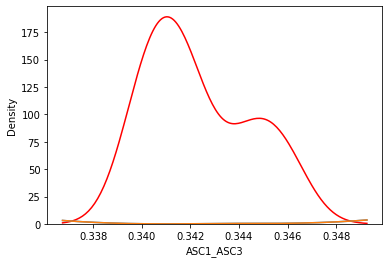

In [125]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC1_ASC3_Hmapped_distance_all,bw=0.5,color='red')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.34, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('ASC1_ASC3')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC1_GSC2_Hmapped_distance_all
Mean: Raw data 0.29833333333333334
Mode: Raw data 0.2967840222308252
Mode: Gauss-fitted 0.2967840222308252


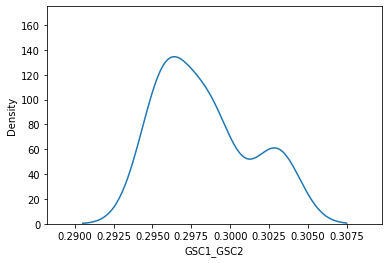

In [126]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC1_GSC2_Hmapped_distance_all)
xmean = np.mean(GSC1_GSC2_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(GSC1_GSC2_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC1_GSC2_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC1_GSC2_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC1_GSC2_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.12461261721601902
parameter K is:  56.52774976134848


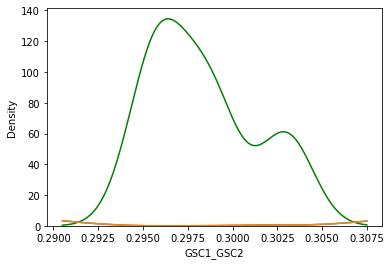

In [127]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC1_GSC2_Hmapped_distance_all,bw=0.5,color='green')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.295, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('GSC1_GSC2')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC2_GSC3_Hmapped_distance_all
Mean: Raw data 0.29433333333333334
Mode: Raw data 0.2943973160875418
Mode: Gauss-fitted 0.2943973160875418


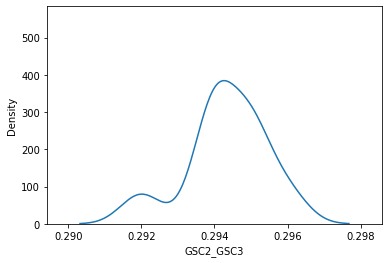

In [128]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC2_GSC3_Hmapped_distance_all)
xmean = np.mean(GSC2_GSC3_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(GSC2_GSC3_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC2_GSC3_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC2_GSC3_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC2_GSC3_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

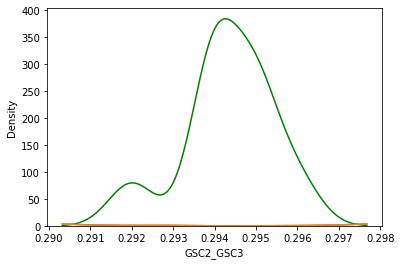

In [129]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC2_GSC3_Hmapped_distance_all,bw=0.5,color='green')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.29, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('GSC2_GSC3')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.8 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC3_GSC4_Hmapped_distance_all
Mean: Raw data 0.2954444444444444
Mode: Raw data 0.29355013624107607
Mode: Gauss-fitted 0.29355013624107607


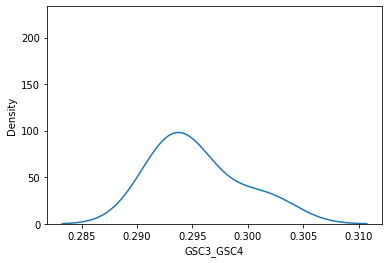

In [130]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC3_GSC4_Hmapped_distance_all)
xmean = np.mean(GSC3_GSC4_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(GSC3_GSC4_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC3_GSC4_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC3_GSC4_Hmapped_distance_all,bw=0.8)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC3_GSC4_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  0.29633236953051373
parameter K is:  33117.54381532362


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.8 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


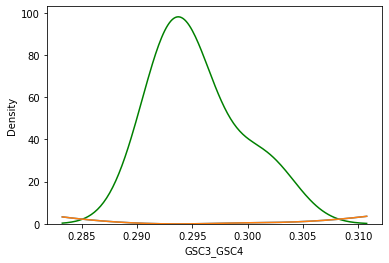

In [131]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC3_GSC4_Hmapped_distance_all,bw=0.8,color='green')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.29, 100000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('GSC3_GSC4')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC4_GSC1_Hmapped_distance_all
Mean: Raw data 0.16322222222222224
Mode: Raw data 0.16301537419014706
Mode: Gauss-fitted 0.16301537419014706


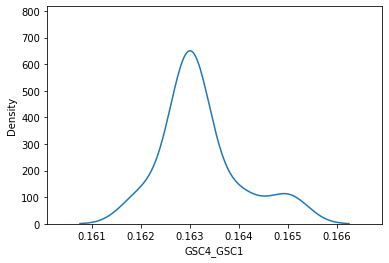

In [132]:

# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC4_GSC1_Hmapped_distance_all)
xmean = np.mean(GSC4_GSC1_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(GSC4_GSC1_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC4_GSC1_Hmapped_distance_all,bins=10)
# 
# 
# 

# density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC4_GSC1_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC4_GSC1_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.16344011014260804
parameter K is:  873559.1173101438


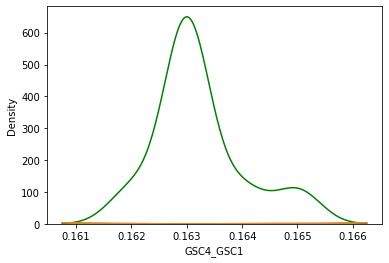

In [133]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC4_GSC1_Hmapped_distance_all,bw=0.5,color='green')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.163, 200000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('GSC4_GSC1')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC2_GSC4_Hmapped_distance_all
Mean: Raw data 0.3938888888888889
Mode: Raw data 0.39150394245324055
Mode: Gauss-fitted 0.39150394245324055


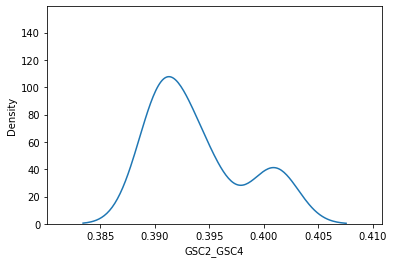

In [134]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC2_GSC4_Hmapped_distance_all)
xmean = np.mean(GSC2_GSC4_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(GSC2_GSC4_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC2_GSC4_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC2_GSC4_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC2_GSC4_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


parameter R_o is:  0.33954545781712137
parameter K is:  569.4168871433907


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


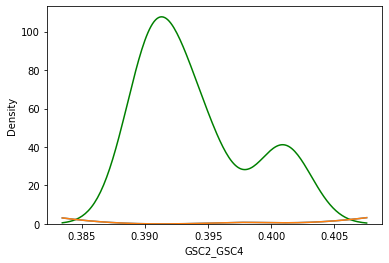

In [135]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC2_GSC4_Hmapped_distance_all,bw=0.5,color='green')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.39, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('GSC2_GSC4')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC1_GSC3_Hmapped_distance_all
Mean: Raw data 0.34177777777777785
Mode: Raw data 0.341498270352621
Mode: Gauss-fitted 0.341498270352621


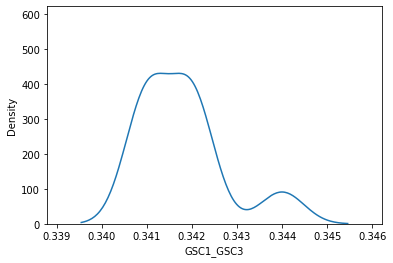

In [136]:


# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC1_GSC3_Hmapped_distance_all)
xmean = np.mean(GSC1_GSC3_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(GSC1_GSC3_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC1_GSC3_Hmapped_distance_all,bins=10)
# 
# 
# 

# density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC1_GSC3_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC1_GSC3_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  0.3420774953441199
parameter K is:  566089.0839313031


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


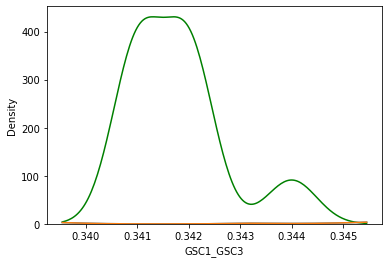

In [137]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC1_GSC3_Hmapped_distance_all,bw=0.5,color='green')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.34, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('GSC1_GSC3')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


CSC1_CSC2_Hmapped_distance_all
Mean: Raw data 0.22566666666666663
Mode: Raw data 0.2244102683458179
Mode: Gauss-fitted 0.2244102683458179


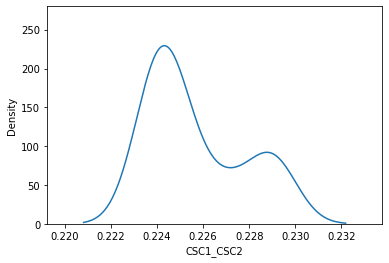

In [138]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(CSC1_CSC2_Hmapped_distance_all)
xmean = np.mean(CSC1_CSC2_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(CSC1_CSC2_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(CSC1_CSC2_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(CSC1_CSC2_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("CSC1_CSC2_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


parameter R_o is:  0.208845038038887
parameter K is:  5397.898324699243


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


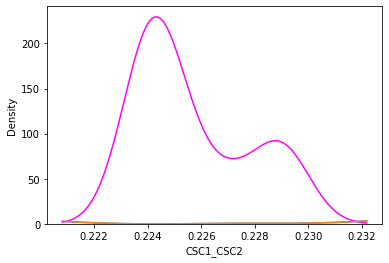

In [139]:
#get probability distribution from data
plt2 = sns.kdeplot(CSC1_CSC2_Hmapped_distance_all,bw=0.5,color='magenta')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.22, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('CSC1_CSC2')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

CSC2_CSC3_Hmapped_distance_all
Mean: Raw data 0.28755555555555556
Mode: Raw data 0.2860929641095023
Mode: Gauss-fitted 0.2860929641095023


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


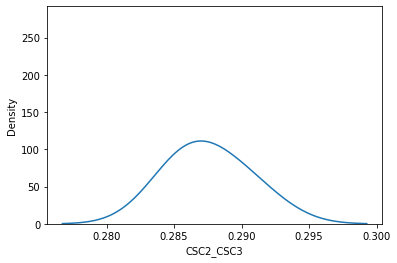

In [140]:

# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(CSC2_CSC3_Hmapped_distance_all)
xmean = np.mean(CSC2_CSC3_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(CSC2_CSC3_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(CSC2_CSC3_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(CSC2_CSC3_Hmapped_distance_all,bw=1.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("CSC2_CSC3_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  0.2878057741405115
parameter K is:  50159.646426148596


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


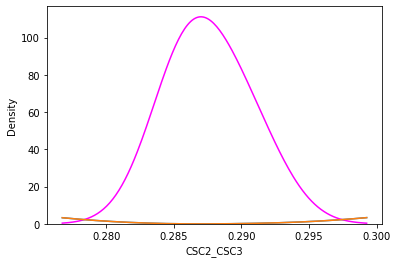

In [141]:
#get probability distribution from data
plt2 = sns.kdeplot(CSC2_CSC3_Hmapped_distance_all,bw=1.2,color='magenta')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.286, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('CSC2_CSC3')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


CSC3_CSC1_Hmapped_distance_all
Mean: Raw data 0.26933333333333337
Mode: Raw data 0.26798104767374203
Mode: Gauss-fitted 0.26798104767374203


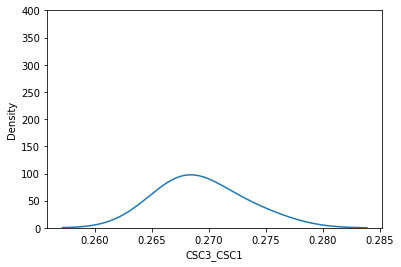

In [142]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(CSC3_CSC1_Hmapped_distance_all)
xmean = np.mean(CSC3_CSC1_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(CSC3_CSC1_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(CSC3_CSC1_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(CSC3_CSC1_Hmapped_distance_all,bw=1.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("CSC3_CSC1_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.2698626522395328
parameter K is:  34957.57069951003


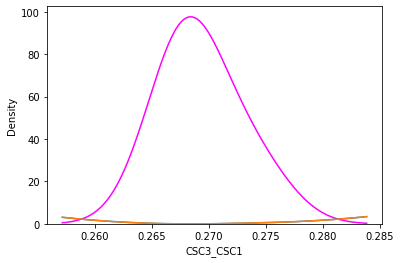

In [143]:
#get probability distribution from data
plt2 = sns.kdeplot(CSC3_CSC1_Hmapped_distance_all,bw=1.2,color='magenta')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.267, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('CSC3_CSC1')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


USC1_USC2_Hmapped_distance_all
Mean: Raw data 0.22377777777777774
Mode: Raw data 0.22272525908184523
Mode: Gauss-fitted 0.22272525908184523


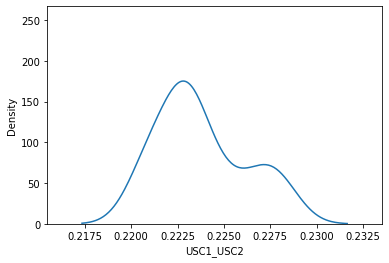

In [144]:


# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(USC1_USC2_Hmapped_distance_all)
xmean = np.mean(USC1_USC2_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(USC1_USC2_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(USC1_USC2_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(USC1_USC2_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("USC1_USC2_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.19673291751598004
parameter K is:  2331.2113641604046


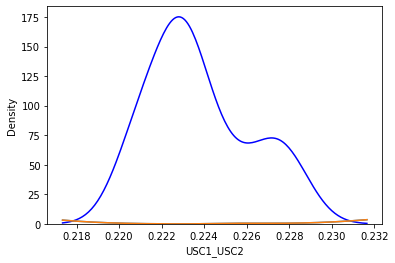

In [145]:
#get probability distribution from data
plt2 = sns.kdeplot(USC1_USC2_Hmapped_distance_all,bw=0.5,color='blue')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.22, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('USC1_USC2')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

USC2_USC3_Hmapped_distance_all
Mean: Raw data 0.29122222222222216
Mode: Raw data 0.29075173794456083
Mode: Gauss-fitted 0.29075173794456083


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


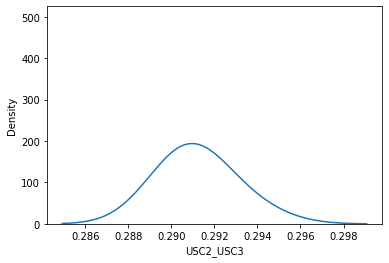

In [146]:

# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(USC2_USC3_Hmapped_distance_all)
xmean = np.mean(USC2_USC3_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(USC2_USC3_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(USC2_USC3_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(USC2_USC3_Hmapped_distance_all,bw=1.3)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("USC2_USC3_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.2754554487797453
parameter K is:  7639.338230118565


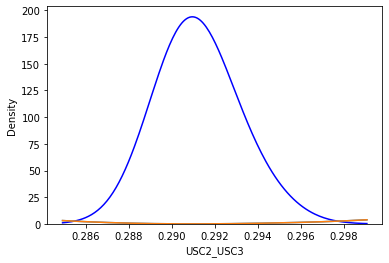

In [147]:
#get probability distribution from data
plt2 = sns.kdeplot(USC2_USC3_Hmapped_distance_all,bw=1.3,color='blue')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.29, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('USC2_USC3')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


USC3_USC1_Hmapped_distance_all
Mean: Raw data 0.27411111111111114
Mode: Raw data 0.2740630964301933
Mode: Gauss-fitted 0.2740630964301933


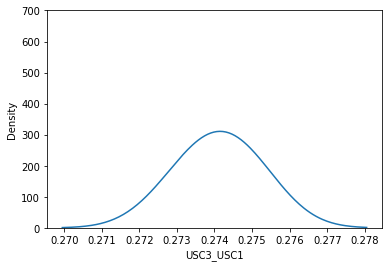

In [148]:

# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(USC3_USC1_Hmapped_distance_all)
xmean = np.mean(USC3_USC1_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(USC3_USC1_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(USC3_USC1_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(USC3_USC1_Hmapped_distance_all,bw=1.3)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("USC3_USC1_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.3089575970902345
parameter K is:  1697.2253369750717


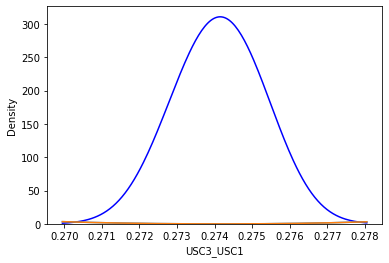

In [149]:
#get probability distribution from data
plt2 = sns.kdeplot(USC3_USC1_Hmapped_distance_all,bw=1.3,color='blue')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.28, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('USC3_USC1')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

In [150]:
distance_parameters['Parameter'] = distance_parameters_dict['Parameter']
distance_parameters['raw data mean value'] = distance_parameters_dict['raw data mean value']
distance_parameters['raw data mode value gaussian-fitted mode value'] = distance_parameters_dict['raw data mode value gaussian-fitted mode value']
distance_parameters['Seed value obtained using BOltzmann inversion'] = distance_parameters_dict['Seed value obtained using BOltzmann inversion']
distance_parameters['K from boltzmann inversion'] = distance_parameters_dict['K from boltzmann inversion']
distance_parameters

,Parameter,raw data mean value,raw data mode value gaussian-fitted mode value,Seed value obtained using BOltzmann inversion,K from boltzmann inversion
0,BB3_pBB1,0.366000,0.345563,0.368411,890.281746
1,BB1_BB2,0.326333,0.326750,0.326178,52999.845177
2,BB2_BB3,0.268111,0.268950,0.307868,1348.226141
3,BB3_ASC1,0.337333,0.337470,0.337119,41001.466591
4,BB3_USC1,0.329111,0.331292,0.328690,48404.206829
5,BB3_GSC1,0.334444,0.333556,0.334599,61367.572891
6,BB3_CSC1,0.329889,0.331586,0.329749,27965.977667
7,ASC1_ASC2,0.234667,0.233398,0.234886,87947.938309
8,ASC2_ASC3,0.270667,0.269154,0.248556,3500.992766
9,ASC3_ASC4,0.295778,0.294117,0.296274,87366.047939


In [151]:
distance_parameters.to_csv("sirna_parameters_distance.csv")